I'm going to use newspaper text as training data to develop a Neural Network that can translate between different English dialects. As a start, I'll compare different countries (U.S. vs U.K., but could add South Africa, Australia, Bahamas, Belize, Ghana, etc.), but it could be trained to work on regions within countries.<br /><br />
I'll start by downloading U.K. training data from The Guardian.

In [150]:
import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [8]:

ARTICLES_DIR = join('tempdata', 'articles')
makedirs(ARTICLES_DIR, exist_ok=True)
# Sample URL
#
# http://content.guardianapis.com/search?from-date=2010-01-01&
# to-date=2018-01-01&order-by=newest&show-fields=all&page-size=200
# &api-key=your-api-key-goes-here

MY_API_KEY = open("guardian_key.txt").read().strip()
API_ENDPOINT = 'http://content.guardianapis.com/search'
my_params = {
    'from-date': "2011-05-06",
    'to-date': "2018-01-01",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200, # 200 is the max
    'api-key': MY_API_KEY
}


# day iteration from here:
# http://stackoverflow.com/questions/7274267/print-all-day-dates-between-two-dates
start_date = date(2011, 5, 6)
end_date = date(2018, 1, 1)
dayrange = range((end_date - start_date).days + 1)
for daycount in dayrange:
    dt = start_date + timedelta(days=daycount)
    datestr = dt.strftime('%Y-%m-%d')
    fname = join(ARTICLES_DIR, datestr + '.json')
    if not exists(fname):
        # then let's download it
        print("Downloading", datestr)
        all_results = []
        my_params['from-date'] = datestr
        my_params['to-date'] = datestr
        current_page = 1
        total_pages = 1
        while current_page <= total_pages:
            print("...page", current_page)
            my_params['page'] = current_page
            resp = requests.get(API_ENDPOINT, my_params)
            data = resp.json()
            all_results.extend(data['response']['results'])
            # if there is more than one page
            current_page += 1
            total_pages = data['response']['pages']

        with open(fname, 'w') as f:
            print("Writing to", fname)

            # re-serialize it for pretty indentation
            f.write(json.dumps(all_results, indent=2))

...page 1
...page 2
Writing to tempdata/articles/2011-05-07.json
...page 1
Writing to tempdata/articles/2011-05-08.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-09.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-10.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-11.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-12.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-13.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-14.json
...page 1
Writing to tempdata/articles/2011-05-15.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-17.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-18.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-19.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-05-20.json
...page 1
...page 2
Writing to tempdata/articles/2011-05-21.

Writing to tempdata/articles/2011-08-07.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-08.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-09.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-10.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-11.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-08-12.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-13.json
...page 1
Writing to tempdata/articles/2011-08-14.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-15.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-16.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-17.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-18.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-08-19.json
...page 1
...page 2
Writing to tempdata/articles/2011-08-20.json
...page 1
Writing to tempdata/articles/2011-08-21.json
...page 1
...page 2
Writing to tempdata/artic

...page 2
Writing to tempdata/articles/2011-11-08.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-09.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-10.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-11.json
...page 1
Writing to tempdata/articles/2011-11-12.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-13.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-14.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-15.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-17.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-18.json
...page 1
Writing to tempdata/articles/2011-11-19.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-20.json
...page 1
...page 2
Writing to tempdata/articles/2011-11-21.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2011-11-22.

...page 2
Writing to tempdata/articles/2012-02-09.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-02-10.json
...page 1
Writing to tempdata/articles/2012-02-11.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-12.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-13.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-14.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-15.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-02-17.json
...page 1
Writing to tempdata/articles/2012-02-18.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-19.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-20.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-21.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-22.json
...page 1
...page 2
Writing to tempdata/articles/2012-02-23.json
...page 1
...page 2
...page 3
Writi

...page 2
Writing to tempdata/articles/2012-05-12.json
...page 1
Writing to tempdata/articles/2012-05-13.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-14.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-05-15.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-05-17.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-05-18.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-19.json
...page 1
Writing to tempdata/articles/2012-05-20.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-21.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-22.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-23.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-24.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-05-25.json
...page 1
...page 2
Writing to tempdata/articles/2012-05-26.json
...page 1
Writi

Writing to tempdata/articles/2012-08-12.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-13.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-14.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-15.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-16.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-08-17.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-18.json
...page 1
Writing to tempdata/articles/2012-08-19.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-20.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-21.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-22.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-23.json
...page 1
...page 2
...page 3
Writing to tempdata/articles/2012-08-24.json
...page 1
...page 2
Writing to tempdata/articles/2012-08-25.json
...page 1
Writing to tempdata/articles/2012-08-26.json
...page 1
Writing to tempdata/articles/2012-0

ChunkedEncodingError: ("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))

In [10]:
!ls tempdata/articles/*.json | wc -l # number of files with news articles

     990


In [11]:
!grep webPublicationDate tempdata/articles/*.json | wc -l # count how many articles we have

  315778


In [35]:
# merge the JSON files into a single file
import glob

read_files = glob.glob("tempdata/articles/*.json")

with open("tempdata/articles/merged_file.json", "w") as outfile:
     for f in read_files:
            with open(f, "r") as infile:
                temp_infile = infile.read()
                outfile.write(temp_infile)
                outfile.write(',\n')


tempdata/articles/2011-12-10.json
tempdata/articles/2011-02-10.json
tempdata/articles/2010-08-09.json
tempdata/articles/2012-01-23.json
tempdata/articles/2010-06-17.json
tempdata/articles/2010-09-24.json
tempdata/articles/2010-05-07.json
tempdata/articles/2011-06-04.json
tempdata/articles/2010-12-03.json
tempdata/articles/2012-09-14.json
tempdata/articles/2010-02-03.json
tempdata/articles/2011-05-14.json
tempdata/articles/2011-07-29.json
tempdata/articles/2010-11-13.json
tempdata/articles/2012-06-27.json
tempdata/articles/2010-01-13.json
tempdata/articles/2011-06-12.json
tempdata/articles/2012-09-02.json
tempdata/articles/2010-02-15.json
tempdata/articles/2010-10-28.json
tempdata/articles/2010-12-15.json
tempdata/articles/2012-05-21.json
tempdata/articles/2011-05-02.json
tempdata/articles/2011-09-21.json
tempdata/articles/2010-01-05.json
tempdata/articles/2010-11-05.json
tempdata/articles/2011-02-06.json
tempdata/articles/2011-12-06.json
tempdata/articles/2010-06-01.json
tempdata/artic

tempdata/articles/2010-08-08.json
tempdata/articles/2010-06-16.json
tempdata/articles/2010-07-30.json
tempdata/articles/2011-10-27.json
tempdata/articles/2012-01-29.json
tempdata/articles/2010-08-03.json
tempdata/articles/2012-03-14.json
tempdata/articles/2010-04-20.json
tempdata/articles/2011-07-23.json
tempdata/articles/2010-11-19.json
tempdata/articles/2012-04-10.json
tempdata/articles/2010-03-24.json
tempdata/articles/2010-01-19.json
tempdata/articles/2011-08-10.json
tempdata/articles/2010-12-09.json
tempdata/articles/2010-02-09.json
tempdata/articles/2011-05-08.json
tempdata/articles/2012-08-25.json
tempdata/articles/2012-04-06.json
tempdata/articles/2011-06-18.json
tempdata/articles/2011-04-25.json
tempdata/articles/2011-08-06.json
tempdata/articles/2012-09-08.json
tempdata/articles/2010-10-22.json
tempdata/articles/2012-07-16.json
tempdata/articles/2011-03-21.json
tempdata/articles/2010-07-26.json
tempdata/articles/2011-10-31.json
tempdata/articles/2010-08-15.json
tempdata/artic

tempdata/articles/2012-02-01.json
tempdata/articles/2010-09-16.json
tempdata/articles/2011-08-28.json
tempdata/articles/2012-05-05.json
tempdata/articles/2010-12-31.json
tempdata/articles/2011-05-26.json
tempdata/articles/2011-09-05.json
tempdata/articles/2010-01-21.json
tempdata/articles/2010-11-21.json
tempdata/articles/2012-06-15.json
tempdata/articles/2012-04-28.json
tempdata/articles/2010-08-17.json
tempdata/articles/2010-06-09.json
tempdata/articles/2010-05-19.json
tempdata/articles/2010-07-24.json
tempdata/articles/2011-03-23.json
tempdata/articles/2012-07-14.json
tempdata/articles/2012-05-29.json
tempdata/articles/2010-10-20.json
tempdata/articles/2011-08-04.json
tempdata/articles/2011-04-27.json
tempdata/articles/2012-04-04.json
tempdata/articles/2010-03-30.json
tempdata/articles/2012-08-27.json
tempdata/articles/2011-09-29.json
tempdata/articles/2012-07-02.json
tempdata/articles/2011-08-12.json
tempdata/articles/2010-03-26.json
tempdata/articles/2012-08-31.json
tempdata/artic

tempdata/articles/2011-02-28.json
tempdata/articles/2011-12-28.json
tempdata/articles/2011-10-15.json
tempdata/articles/2010-04-12.json
tempdata/articles/2012-03-26.json
tempdata/articles/2010-08-31.json
tempdata/articles/2011-07-11.json
tempdata/articles/2010-03-16.json
tempdata/articles/2012-08-01.json
tempdata/articles/2012-04-22.json
tempdata/articles/2011-04-01.json
tempdata/articles/2011-08-22.json
tempdata/articles/2012-02-27.json
tempdata/articles/2010-09-30.json
tempdata/articles/2010-05-13.json
tempdata/articles/2011-11-14.json
tempdata/articles/2011-03-29.json
tempdata/articles/2011-01-14.json
tempdata/articles/2010-06-03.json
tempdata/articles/2011-12-04.json
tempdata/articles/2011-02-04.json
tempdata/articles/2010-11-07.json
tempdata/articles/2010-01-07.json
tempdata/articles/2011-09-23.json
tempdata/articles/2012-05-23.json
tempdata/articles/2010-12-17.json
tempdata/articles/2010-02-17.json
tempdata/articles/2011-06-10.json
tempdata/articles/2010-01-11.json
tempdata/artic

## Get U.S. news articles
I had a hard time finding newspaper APIs that would allow me to download the entire article. Instead, I'm going to use Selenium to scrape articles from USA Today.

In [32]:
import urllib.request, json 

outfile = open('nytimes_data.txt', 'w')

for offset in range(10):
    #address = "https://api.nytimes.com/svc/search/v2/articlesearch.json?offset=%s&api-key=cdbf688a895b41dfa24a692d2b85a96a" % str(offset)
    address = "https://api.nytimes.com/svc/search/v2/articlesearch.json?offset=%s&api-key=cdbf688a895b41dfa24a692d2b85a96a" % str(offset)
    with urllib.request.urlopen(address) as url:
        data = json.loads(url.read().decode())
        print(data)
        outfile.write(data)

        # this lets you search for 1000 a day. So, it is all I have for now.

{'status': 'OK', 'copyright': 'Copyright (c) 2018 The New York Times Company. All Rights Reserved.', 'response': {'docs': [{'web_url': 'https://www.nytimes.com/aponline/2018/01/16/business/ap-us-ford-outlook.html', 'snippet': 'Ford Motor Co. says its pretax earnings will likely fall in 2018 as U.S. sales soften, commodity costs increase and it invests heavily in new electric and hybrid vehicles.', 'blog': {}, 'source': 'AP', 'multimedia': [], 'headline': {'main': 'Ford Says Profits Will Fall in 2018', 'kicker': None, 'content_kicker': None, 'print_headline': 'Ford Says Profits Will Fall in 2018', 'name': None, 'seo': None, 'sub': None}, 'keywords': [], 'pub_date': '2018-01-16T23:21:33+0000', 'document_type': 'article', 'new_desk': 'None', 'byline': {'original': 'By THE ASSOCIATED PRESS', 'person': [], 'organization': 'THE ASSOCIATED PRESS'}, 'type_of_material': 'News', '_id': '5a5e890095d0e0110c1a4e08', 'word_count': 132, 'score': 1.0, 'uri': 'nyt://article/9a751257-b518-534b-887d-b9df

TypeError: write() argument must be str, not dict

In [130]:
import newspaper

def write_newspaper_test(output_filename, newspaper_url, threshold):
    counter = 0
    with open(output_filename, 'w') as output_file:

        paper = newspaper.build(newspaper_url, memoize_articles=False)

        for article in paper.articles:
            counter += 1
            try: # I'm using this because sometimes I get a 404 error
                print(type(article.url), article.url)
                article.download()
                article.parse()
                output_file.write(article.url)
                output_file.write('\n')
                output_file.write(article.text)
                output_file.write('\n')
            except:
                True
            if counter > threshold:
                break

#write_newspaper_test('usatoday_text.txt', 'http://usatoday.com', 1000)
#write_newspaper_test('cnn_text.txt', 'http://cnn.com', 1000)
#write_newspaper_test('wp_text.txt', 'http://washingtonpost.com', 1000)
#write_newspaper_test('nyt_text.txt', 'http://nytimes.com', 1000)
#write_newspaper_test('st_text.txt', 'http://seattletimes.com', 1000)
#write_newspaper_test('la_text.txt', 'http://latimes.com', 1000)
write_newspaper_test('huff_text.txt', 'http://huffingtonpost.com', 5000) # this is downloading non-US articles, so I need to make sure there '.com/' in the url
write_newspaper_test('fox_text.txt', 'http://foxnews.com', 5000)
    
    
    

<class 'str'> http://huffingtonpost.com/section/media/feed
<class 'str'> http://huffingtonpost.com/section/video/feed
<class 'str'> http://huffingtonpost.com/topic/2009-media-deaths/feed
<class 'str'> http://huffingtonpost.com/topic/2011-game-changers/feed
<class 'str'> http://huffingtonpost.com/section/media
<class 'str'> http://huffingtonpost.com/feature/listen-to-america
<class 'str'> http://huffingtonpost.com/section/video
<class 'str'> http://huffingtonpost.com/entry/alabama-expels-sorority-sister-racial-slur_us_5a60a3eee4b01b82649d1895?ncid=inblnkushpmg00000009
<class 'str'> http://huffingtonpost.com/entry/did-fox-news-hide-story-of-trumps-alleged-affair-with-stormy-daniels_us_5a5fcf43e4b053c6a13314ae?ncid=inblnkushpmg00000009
<class 'str'> http://huffingtonpost.com/entry/victims-confront-dr-larry-nassar-in-court_us_5a5fc81be4b0ffcb7fa471d1?ncid=inblnkushpmg00000009
<class 'str'> http://huffingtonpost.com/entry/sarah-jessica-parker-ellen-satc-3_us_5a600f3be4b054e3517724f7?ncid=in

<class 'str'> http://www.huffingtonpost.co.uk/entry/selfless-painter-and-decorator-offers-services-for-free-to-families-going-through-tough-times_uk_5a5de41ce4b03c418968db82?utm_hp_ref=uk-homepage
<class 'str'> http://www.huffingtonpost.co.uk/entry/school-bans-pupils-dressing-as-sports-stars-and-youtubers-on-world-of-work-day-and-twitter-is-divided_uk_5a5f1a21e4b096ecfca8c9ee?utm_hp_ref=uk-homepage
<class 'str'> http://www.huffingtonpost.co.uk/entry/snow-day-school-closures-time-off-work_uk_5a2e67fee4b069ec48aeb8f2?utm_hp_ref=uk-homepage
<class 'str'> http://www.huffingtonpost.co.uk/entry/one-night-with-my-ex-channel-5_uk_5a5f0b9de4b00a7f171bc10e?83&utm_hp_ref=uk-homepage
<class 'str'> http://www.huffingtonpost.co.uk/entry/identifying-as-male-and-giving-birth-made-me-the-happiest-ive-ever-been_uk_5a5f745ae4b096ecfca9a534?vn8&utm_hp_ref=uk-homepage
<class 'str'> http://www.huffingtonpost.co.uk/entry/dolores-oriordan-boyfriend-ole-koretsky-tribute_uk_5a605847e4b046f0811cfeb2?kci&utm_hp_r

<class 'str'> http://quebec.huffingtonpost.ca/janie-houle/oui-les-hommes-sont-influences-par-leurs-amis_a_23336246/
<class 'str'> http://quebec.huffingtonpost.ca/anais-guyon/blogueuse-voyage-j-ai-decide-de-moins-publier-pour-ne-pas-passer-mon-temps-dans-la-spirale-infernale-d-instagram_a_23336197/
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/18/une-elephante-au-nom-de-sophie-gregoire-trudeau-au-kenya_a_23336768/
<class 'str'> http://quebec.huffingtonpost.ca/jocelyn-daneau/la-confiance-a-lere-des-valerie_a_23335689/
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/18/pkp-et-yves-boisvert-a-ne-pas-inviter-au-meme-chalet_a_23336913/
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/18/brigitte-bardot-fustige-les-actrices-qui-font-les-allumeuses-pour-un-role_a_23336838/
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/18/dylan-farrow-affirme-que-woody-allen-la-agresse-a-lage-de-7-ans-le-realisateur-dement-a-nouveau_a_23336854/
<class 'str'> http://quebec.huffingtonpo

<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/letrange-pose-de-victoria-beckham-pour-vogue-vaut-le-detour-nement_a_23335860/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/ce-serait-la-solution-a-des-sourcils-parfaits-pour-vous_a_23335753/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/ghostland-mylene-farmer-inquietante-dans-la-bande-annonce-de-son-prochain-film_a_23335622/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/cette-bouteille-deau-gele-en-2-secondes-voici-pourquoi_a_23335978/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/16/allaiter-pendant-six-mois-reduit-le-risque-de-diabete-chez-la-mere_a_23335267/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/16/un-nouveau-clip-et-une-tournee-internationale-pour-charlotte-cardin_a_23335171/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/16

<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/deux-canadiens-et-deux-americains-enleves-dans-le-nord-du-nigeria_a_23336072/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/trudeau-a-la-malbaie-en-vue-du-g7-espere-des-discussions-franches-et-ouvertes_a_23336360/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/trudeau-soutient-avoir-echange-sur-trump-avec-john-kerry_a_23336363/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/nathalie-leclerc-fille-de-felix-sera-la-candidate-du-pq-dans-charlevoix_a_23336374/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/apple-va-payer-38-milliards-dimpots-sur-ses-profits-a-letranger_a_23336095/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/17/trump-se-rejouit-davoir-pousse-apple-a-rapatrier-250-milliards-de-dollars_a_23336329/?utm_hp_ref=qc-homepage
<class 'str'> http://quebec.huffingto

<class 'str'> http://quebec.huffingtonpost.ca/2018/01/11/brad-pitt-therapie-rupture-angelina-jolie_a_23330869/
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/16/les-robots-menacent-ils-votre-emploi_a_23334748/
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/12/gary-oldman-demande-en-mariage-winston-churchill_a_23331903/
<class 'str'> http://quebec.huffingtonpost.ca/2018/01/11/rose-mcgowan-forcee-de-vendre-sa-maison-harvey-weinstein_a_23330910/
<class 'str'> http://www.huffingtonpost.it/news/governo/
<class 'str'> http://www.huffingtonpost.it/news/pd/
<class 'str'> http://www.huffingtonpost.it/news/m5s/
<class 'str'> http://www.huffingtonpost.it/news/centrodestra/
<class 'str'> http://www.huffingtonpost.it/news/lega/
<class 'str'> http://www.huffingtonpost.it/news/sinistra/
<class 'str'> http://www.huffingtonpost.it/news/banche/
<class 'str'> http://www.huffingtonpost.it/news/crisi/
<class 'str'> http://www.huffingtonpost.it/news/fisco/
<class 'str'> http://www.huffingtonpo

<class 'str'> http://www.huffingtonpost.it/2018/01/18/chiedono-la-benedizione-a-papa-francesco-lui-sposa-a-sorpresa-lhostess-e-lo-steward-in-volo_a_23336844/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/2018/01/18/poliziotta-cade-da-cavallo-davanti-alla-papamobile-francesco-scende-per-soccorrerla_a_23337134/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/nicola-fratoianni/leuropa-dei-pochi-e-quella-dei-molti_a_23336780/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/huffingtonpost/quando-silvio-berlusconi-incontro-gordon-brown-un-inconcludente-storiella-natalizia_a_23336939/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/marco-perduca/sul-niger-gentiloni-e-cavouriano-e-non-solo-perche-conte_a_23336608/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/guido-castelli/ripartono-gli-investimenti-pubblici-solo-se-lautonomia-locale-torna-protagonista_a_23336823/?utm_hp_ref=it-homepage
<class 'str'>

<class 'str'> http://www.huffingtonpost.it/2018/01/18/attilio-fontana-una-stupidata-la-mia-frase-sulla-razza_a_23336562/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/2018/01/17/carlo-de-benedetti-a-otto-e-mezzo-la-riforma-delle-popolari-era-un-segreto-di-pulcinella-mai-parlato-con-la-boschi_a_23336125/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/2018/01/18/renzi-mostra-lestratto-conto-ecco-ho-15-859-euro-meno-di-quando-ero-premier_a_23336626/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/2018/01/17/dellutri-a-un-passo-dalla-scarcerazione_a_23336102/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/2018/01/17/massimo-ammaniti-in-europa-la-famiglia-ha-perso-il-proprio-ruolo-ma-il-ministro-della-solitudine-non-serve-a-niente_a_23336040/?utm_hp_ref=it-homepage
<class 'str'> http://www.huffingtonpost.it/2014/03/17/foto-erotiche-depoca_n_4979785.html
<class 'str'> http://www.huffingtonpost.it/2018/01/18/morte-di-

<class 'str'> http://www.huffingtonpost.com.mx/2018/01/18/cuanto-tiempo-se-conserva-la-comida-congelada-sin-echarse-a-perder_a_23336448/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/medio-de-comunicacion-en-leon-denuncia-ataque-cibernetico_a_23336373/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/8-marcas-que-pueden-transformar-tu-rutina-de-belleza-en-activismo_a_23336276/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/vinario-un-club-en-linea-para-conocer-de-vino-mexicano_a_23335005/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/disenadores-subastaran-los-vestidos-de-los-golden-globes-a-beneficio-de-la-fundacion-times-up_a_23336093/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/video-las-clases-de-espanol-de-penelope-cruz-a-ellen-degeneres_a_23336097/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost

<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/en-diciembre-cada-cinco-horas-hubo-un-secuestro-en-mexico_a_23335956/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/said-dokins-y-leonardo-luna-caligrafias-de-luz-trazos-de-luz_a_23335981/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/demolicion-del-edificio-osa-mayor-en-colonia-doctores-es-la-mas-grande-que-se-hara-en-cdmx-tras-el-sismo_a_23336017/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2017/09/24/dictamen-que-no-pago-delegacion-cuauhtemoc-pudo-haber-evitado-danos-en-edificio-denuncian-vecinos_a_23221293/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/torrent-toma-las-riendas-de-un-parlament-controlado-por-el-independentismo_a_23336060/?utm_hp_ref=mx-homepage
<class 'str'> http://www.huffingtonpost.com.mx/2018/01/17/asi-van-las-impugnaciones-a-la-ley-de-seguridad-interior_a_23335969/?utm_hp_ref=

<class 'str'> http://www.huffingtonpost.ca/shane-mackenzie/conservatives-cant-compete-with-liberals-on-economic-issues_a_23335010/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/erica-berman/boys-need-to-be-taught-consent-by-their-fathers_a_23334844/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/18/meghan-markle-prince-harry-thank-you-cards_a_23336816/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/18/lupita-nyongo-childrens-book_a_23336978/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/ale-brown/how-to-keep-personal-data-safe-when-companies-cant-or-wont_a_23331062/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/17/male-midwife_a_23335834/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/17/spring-style-trends-2018_a_23336047/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/sam-karney/a-winter-spent-fur-trapping-helped-me-re

<class 'str'> http://www.huffingtonpost.ca/2018/01/17/david-allen-turpin-and-louise-turpin-didnt-let-13-kids-see-relatives-says-aunt_a_23335955/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/17/b-c-premier-john-horgan-says-he-wont-ban-foreign-buyers_a_23335977/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/17/n-s-funeral-home-accidentally-cremates-wrong-woman_a_23336028/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/17/quebec-to-raise-minimum-wage-to-12-on-may-1_a_23335898/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/17/north-and-south-korea-to-form-their-1st-joint-olympic-team_a_23335778/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/2018/01/16/university-of-guelph-students-claim-professor-edward-hedican-demeaned-classmate-with-severe-anxiety_a_23334864/?utm_hp_ref=ca-homepage
<class 'str'> http://www.huffingtonpost.ca/danielle-s-mclaughlin/the-girl-who

<class 'str'> http://www.huffingtonpost.fr/2018/01/18/la-pape-francois-celebre-un-mariage-a-11-000-metres-daltitude-une-premiere_a_23336906/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/florian-silnicki/pourquoi-jeremstar-traverse-le-bad-buzz-typique-qui-peut-faire-basculer-une-carriere_a_23336914/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/18/les-accusations-dabus-sexuels-relancees-contre-woody-allen_a_23336590/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/18/la-creatrice-de-balancetonporc-sandra-muller-poursuivie-pour-diffamation_a_23336596/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/18/gagnez-les-tenues-portees-par-nicole-kidman-jude-law-ou-elisabeth-moss-aux-golden-globes_a_23336929/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/18/alain-delon-a-decide-de-piquer-son-chien-pour-quil-parte-en-meme-temps-que-lui_a_23336958/?utm_hp_ref=fr-homepage


<class 'str'> http://www.huffingtonpost.fr/2018/01/18/200-surveillants-de-prison-bloquent-fleury-merogis-les-crs-envoyes-pour-les-deloger_a_23336605/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/18/airbus-cette-commande-demirates-sauve-le-programme-a380-soulagement-a-toulouse_a_23336750/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/18/les-frais-bancaires-grimpent-encore-en-2018-malgre-la-concurrence-des-banques-en-lignes_a_23336825/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/18/psa-sera-la-premiere-entreprise-a-appliquer-un-accord-de-rupture-conventionnelle-collective_a_23336855/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/17/etats-generaux-de-la-bioethique-oubliez-la-pma-voici-le-debat-a-surveiller_a_23335772/?utm_hp_ref=fr-homepage
<class 'str'> http://www.huffingtonpost.fr/2018/01/17/gpa-elisabeth-badinter-et-109-autres-personnalites-signent-une-tribune-pour-une-ref

<class 'str'> http://www.huffingtonpost.in/danielle-s-mclaughlin/the-girl-who-lied-about-hijab-attack-deserves-an-apology_a_23335294/
<class 'str'> http://www.huffingtonpost.in/2018/01/18/what-does-it-take-for-a-kashmiri-muslim-woman-to-be-a-political-activist-in-modis-india_a_23336231/
<class 'str'> http://www.huffingtonpost.in/2018/01/18/murders-by-u-s-white-supremacists-more-than-doubled-in-2017-new-report-shows_a_23336516/
<class 'str'> http://www.huffingtonpost.in/2018/01/17/new-york-times-opinion-page-to-publish-letters-from-trump-supporters_a_23336418/
<class 'str'> http://www.huffingtonpost.in/kumar-rajesh/the-scs-and-sts-still-have-the-highest-child-mortality-cases_a_23335275/
<class 'str'> http://www.huffingtonpost.in/2018/01/02/india-s-factory-activity-expanded-at-the-fastest-pace-in-five-years-in-december-reveals-survey_a_23321239/
<class 'str'> http://www.huffingtonpost.in/2017/12/28/worlds-wealthiest-billionaires-got-nearly-1-trillion-richer-in-2017-bloomberg_a_23319123/


<class 'str'> http://www.huffingtonpost.in/2018/01/11/wed-swipe-right-on-this-flirty-kangaroo_a_23331430/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/11/the-6-relationship-problems-millennials-bring-up-the-most-in-therapy_a_23331434/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/anubhuti-krishna/khichdi-pongal-undhiyu-peetha-what-are-you-eating-this-winter_a_23328777/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/10/just-gorgeous-pictures-of-12-sa-men-vying-for-the-cosmo-sexiest-man-title_a_23330369/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/10/sleeping-more-could-help-you-cut-down-on-sugar-and-lose-weight_a_23330385/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/10/meghan-markle-is-gone-from-social-media_a_23330338/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/10/ikea-wants-pregnant-women-to-pee-on-this-ad-to-see-a-disco

<class 'str'> http://www.huffingtonpost.in/2018/01/12/how-the-rape-and-murder-of-a-7-year-old-girl-in-pakistans-hotbed-of-child-sexual-assault-has-incited-massive-protests_a_23331557/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/12/india-sends-its-100th-satellite-into-space_a_23331495/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/11/the-supreme-court-of-india-raised-an-important-humanitarian-question-about-aadhaar_a_23330402/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/11/a-cricket-writer-compared-bowling-to-newly-married-anushkas-nagging-and-men-just-cant-understand-why-its-offensive_a_23330441/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/11/5-women-accuse-james-franco-of-sexual-misconduct_a_23331403/?utm_hp_ref=in-homepage
<class 'str'> http://www.huffingtonpost.in/2018/01/11/singer-seal-accuses-oprah-of-knowing-about-weinstein-rumors-for-decades_a_23331397/?utm_hp_re

<class 'str'> http://www.huffingtonpost.es/2018/01/18/blanca-suarez-comparte-una-foto-junto-a-yon-gonzalez-de-hace-10-anos_a_23336805/
<class 'str'> http://www.huffingtonpost.es/2018/01/18/la-actriz-porno-stormy-daniels-aseguro-en-2011-que-tuvo-sexo-generico-de-libro-de-texto-con-trump_a_23336829/
<class 'str'> http://www.huffingtonpost.es/2018/01/18/la-receta-contra-el-populismo-politicos-comprometidos-y-protestas-ciudadanas_a_23336755/
<class 'str'> http://www.huffingtonpost.es/2018/01/18/barack-obama-triunfa-con-su-carinosa-felicitacion-de-cumpleanos-a-michelle_a_23336561/
<class 'str'> http://www.huffingtonpost.es/2018/01/17/el-libro-que-cabrea-a-trump-se-convertira-en-una-serie-de-television_a_23336479/
<class 'str'> http://www.huffingtonpost.es/2018/01/18/el-hilo-sobre-la-casa-de-mis-suenos-con-el-que-no-podras-parar-de-reir_a_23337059/
<class 'str'> http://www.huffingtonpost.es/2018/01/18/perez-reverte-llama-imbeciles-a-la-junta-de-andalucia-por-esta-peticion-a-facua_a_23337045/

<class 'str'> http://www.huffingtonpost.es/2018/01/18/puigdemont-pide-el-voto-delegado-para-la-sesion-de-investidura_a_23336790/?utm_hp_ref=es-homepage
<class 'str'> http://www.huffingtonpost.es/2018/01/18/torrent-no-se-moja-sobre-la-investidura-telematica_a_23336648/?utm_hp_ref=es-homepage
<class 'str'> http://www.huffingtonpost.es/2018/01/18/saenz-de-santamaria-puigdemont-no-va-a-ser-presidente-de-la-generalitat_a_23336612/?utm_hp_ref=es-homepage
<class 'str'> http://www.huffingtonpost.es/2018/01/17/parlament-planet_a_23335928/?utm_hp_ref=es-homepage
<class 'str'> http://www.huffingtonpost.es/2018/01/18/los-bancos-son-tus-amiguis-por-marta-flich_a_23336397/?utm_hp_ref=es-homepage
<class 'str'> http://www.huffingtonpost.es/2018/01/18/pascal-se-reune-con-rubalcaba-un-dia-despues-de-ver-a-puigdemont_a_23337100/?utm_hp_ref=es-homepage
<class 'str'> http://www.huffingtonpost.es/2018/01/18/un-padre-triunfa-con-esta-nota-a-sus-hijos-para-la-cena_a_23336632/?utm_hp_ref=es-homepage
<class 'st

<class 'str'> http://www.huffingtonpost.es/2018/01/09/cientos-de-personas-se-quitan-los-pantalones-para-viajar-en-metro_a_23328604/
<class 'str'> http://www.huffingtonpost.es/2018/01/08/ernesto-sevilla-y-joaquin-reyes-dan-a-dani-rovira-donde-mas-le-duele-en-el-anuncio-de-los-goya_a_23327656/
<class 'str'> http://www.huffingtonpost.es/2018/01/13/una-increible-maniobra-evita-un-accidente-en-plena-autopista_a_23332656/
<class 'str'> http://www.huffingtonpost.es/2018/01/12/como-tocar-la-marcha-imperial-de-star-wars-con-un-papel-y-lapiz_a_23331954/
<class 'str'> http://www.huffingtonpost.es/2018/01/10/un-nino-recibe-un-platano-de-regalo-y-le-encanta_a_23329625/
<class 'str'> http://www.huffingtonpost.es/2018/01/11/a-ti-tambien-te-afecta-la-movida-de-las-pensiones-por-marta-flich_a_23330064/
<class 'str'> http://www.huffingtonpost.es/2018/01/12/el-genial-poema-feminista-hecho-a-traves-de-canciones-machistas_a_23331875/
<class 'str'> http://www.huffingtonpost.es/2018/01/13/el-riesgo-de-intent

<class 'str'> http://www.huffingtonpost.jp/2018/01/12/atsushi-tamura_a_23330721/
<class 'str'> http://www.huffingtonpost.de/news/deutschland/
<class 'str'> http://www.huffingtonpost.de/news/europa/
<class 'str'> http://www.huffingtonpost.de/news/international/
<class 'str'> http://www.huffingtonpost.de/news/gegen-populismus/
<class 'str'> http://www.huffingtonpost.de/news/prekaer/
<class 'str'> http://www.huffingtonpost.de/news/young-urban-muslims/
<class 'str'> http://www.huffingtonpost.de/news/future-of-work/
<class 'str'> http://www.huffingtonpost.de/news/karriere/
<class 'str'> http://www.huffingtonpost.de/news/technik/
<class 'str'> http://www.huffingtonpost.de/news/mobilitaet/
<class 'str'> http://www.huffingtonpost.de/news/umweltschtutz/
<class 'str'> http://www.huffingtonpost.de/news/entwicklungshilfe/
<class 'str'> http://www.huffingtonpost.de/news/mutmacher/
<class 'str'> http://www.huffingtonpost.de/news/fernsehen/
<class 'str'> http://www.huffingtonpost.de/news/serien/
<cla

<class 'str'> http://www.huffingtonpost.de/entry/beschamende-szene-im-bundestag-regierung-weicht-frage-zu-deals-mit-erdogan-aus_de_5a5f815be4b0ee2ff32cb989?utm_hp_ref=de-homepage
<class 'str'> http://www.huffingtonpost.de/entry/lindner-hatte-seine-grossmutter-verkauft-grunen-chefin-peter-stichelt-gegen-fpd-chef_de_5a5f2002e4b096ecfca8d693?utm_hp_ref=de-homepage
<class 'str'> http://www.huffingtonpost.de/entry/so-haeltst-du-deine-sportvorsaetze-ein_de_5a60a8e9e4b01f3bca58e334
<class 'str'> http://www.huffingtonpost.de/entry/keiner-wollte-nachgeben-sturkopf-rentner-blockieren-sich-eine-stunde-lang-mit-dem-auto_de_5a606201e4b054e351775d0b
<class 'str'> http://www.huffingtonpost.de/entry/frau-auf-rugen-vergewaltigt-um-den-tater-zu-uberfuhren-greift-die-polizei-zu-einem-drastischen-mittel_de_5a604607e4b0ccf9f1216648
<class 'str'> http://www.huffingtonpost.de/entry/ein-leben-ohne-merkel-ist-moglich-selbst-deutsche-medien-feiern-kurz-berlin-besuch_de_5a6052a2e4b054e3517739f6
<class 'str'> htt

<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/cyrilwatch-5-themes-president-in-waiting-is-making-his-own_a_23336587/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/trump-dished-out-fake-news-awards-twitter-dished-them-right-back-at-him_a_23336707/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/bathabile-dlamini-and-team-refuse-questions-on-anything_a_23336723/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/minister-of-loneliness-appointed-in-the-uk_a_23336720/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/craig-bailie/sas-toxic-leadership-and-its-false-prophets_a_23336620/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/nan-hauser/a-humpback-whale-tucked-me-under-its-fin-and-saved-me-from-a-lurking-tiger-shark_a_23336541/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/uyangthanda-na-the-awkward-the-hil

<class 'str'> http://www.huffingtonpost.co.za/2018/01/15/13-siblings-held-captive-by-parents-some-in-chains-and-starving-us-police-say_a_23334245/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/15/ugandan-lawyers-seek-to-quash-museveni-president-for-life-law_a_23333946/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/15/npa-to-target-the-gupta-fortune_a_23333752/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/15/hawaii-emergency-employee-who-pushed-the-wrong-button-has-been-reassigned_a_23333911/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/15/this-harry-potter-fan-film-about-voldemorts-rise-is-better-than-you-think_a_23333926/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/15/canadian-charged-with-running-leakedsource-com-selling-stolen-info_a_23333943/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/15/cont

<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/is-2018-the-year-of-the-side-hustle_a_23336828/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/um-theres-a-cannon-on-my-cricket-ground_a_23336857/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/dear-parents-posting-back-to-school-pics-online-be-careful_a_23336645/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/caster-vs-serena-for-laureus-sportswoman-of-the-year_a_23336531/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/will-smith-needs-his-own-nature-documentary-series-right-now_a_23336708/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/18/paying-for-screen-time-on-real-talk-with-anele-not-uncommon-producer_a_23336537/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/mbulelo-nguta/part-privatise-police-service-to-solve-crime-in-south-africa_a_2333566

<class 'str'> http://www.huffingtonpost.co.za/2018/01/16/eff-calls-afriforum-ku-klux-klan_a_23334314/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/16/selena-gomezs-mom-says-shes-not-happy-her-daughter-is-back-with-justin-bieber_a_23334328/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/16/cape-town-could-run-out-of-water-by-april_a_23334555/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/16/we-still-respect-you-u-s-embassy-tells-south-africa_a_23334455/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/16/africa-should-respond-to-trump-s-racist-rant-by-taking-the-moral-high-ground_a_23334273/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/15/trump-attacks-senator-who-confirmed-shithole-countries-comment_a_23334246/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/16/martian-ice-deposits-could-sustain-human-outpo

<class 'str'> http://www.huffingtonpost.co.za/2018/01/13/malema-h-and-m-closed-for-calling-our-children-baboons_a_23332823/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/13/chaos-as-eff-trashes-gauteng-h-and-m-stores_a_23332512/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/13/the-end-of-the-f-ing-world-is-the-latest-netflix-show-everyone-is-binge-watching_a_23332467/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/13/late-night-tv-hosts-skewer-trump-for-shithole-countries-comment_a_23332508/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/12/11-year-old-becomes-youngest-person-to-swim-from-robben-island-to-cape-town_a_23331698/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/12/are-you-the-star-the-mabrrr-biopic-is-looking-for_a_23331855/?utm_hp_ref=za-homepage
<class 'str'> http://www.huffingtonpost.co.za/2018/01/13/listeria-outbreak-in-

<class 'str'> http://www.huffingtonpost.gr/entry/meme-e-victoria-beckham-ex-aitias-mias-idiaitera-avolis-pozas_gr_5a60732be4b062a7df0b1440
<class 'str'> http://www.huffingtonpost.gr/entry/yperaspizetai-ton-woody-allen-o-alec-baldwin-prokalontas-kataigismo-antidraseon_gr_5a60599ce4b046f0811d01cc
<class 'str'> http://www.huffingtonpost.gr/entry/einai-poson-eton-yioi-diasemon-star-kanoen-to-ntempoeto-toes-sten-pasarela-kai-aisthanomaste-pole-meyaloi_gr_5a604bdfe4b054e351773561
<class 'str'> http://www.huffingtonpost.gr/entry/o-phylax-gremistike-anthropini-paremvasi-o-dimarchos-d-hadjidakis_gr_5a5f6ecde4b096ecfca9987f
<class 'str'> http://www.huffingtonpost.gr/entry/oi-pio-koines-yenetikes-metallaxeis-poe-oi-perissoteroi-echoeme_gr_5a60c80de4b062a7df0bb6ef
<class 'str'> http://www.huffingtonpost.gr/entry/oi-eryazomenoi-tes-athenaikes-zethopoiias-apodeichthekan-krefa-talenta_gr_5a60bf31e4b01b82649d4c00
<class 'str'> http://www.huffingtonpost.gr/entry/aetes-einai-oi-12-eroteseis-poe-prepei-n

<class 'str'> http://www.huffingtonpost.gr/entry/e-tromaktike-stiyme-poe-ena-skafos-trakarei-me-varka-oi-epivates-epesan-panikovletoi-ste-thalassa_gr_5a60b4dce4b01b82649d3537?utm_hp_ref=gr-homepage
<class 'str'> http://www.huffingtonpost.gr/entry/drone-se-rolo-naeayososte-sten-aestralia-esose-deo-kolemvetes_gr_5a6070a1e4b062a7df0b0a7e?utm_hp_ref=gr-homepage
<class 'str'> http://www.huffingtonpost.gr/entry/na-epideixei-realismo-kalese-ten-pydm-o-yy-toe-nato_gr_5a60aee8e4b01b82649d297b?utm_hp_ref=gr-homepage
<class 'str'> http://www.huffingtonpost.gr/entry/dnt-den-echoen-yeferothei-me-toes-eeropaioes-oles-oi-diafores-yia-to-elleniko-chreos_gr_5a60c348e4b01f3bca5914ea?utm_hp_ref=gr-homepage
<class 'str'> http://www.huffingtonpost.gr/entry/senantese-tsakalotoe-me-stoernara-ti-sezetesan_gr_5a6089dce4b01b82649cf8c2?utm_hp_ref=gr-homepage
<class 'str'> http://www.huffingtonpost.gr/entry/poso-kemainetai-o-neos-foros-diamones-ana-dianektereese-sta-xenodocheia-epivarenei-ton-pelate_gr_5a60c30ee4

<class 'str'> http://www.huffingtonpost.kr/news/green-light
<class 'str'> http://www.huffingtonpost.kr/news/gay-voice
<class 'str'> http://www.huffingtonpost.kr/news/women
<class 'str'> http://www.huffingtonpost.kr/news/young-voice
<class 'str'> http://www.huffingtonpost.kr/news/green
<class 'str'> http://www.huffingtonpost.kr/news/animal
<class 'str'> http://www.huffingtonpost.kr/news/north-korea
<class 'str'> http://www.huffingtonpost.kr/news/sex
<class 'str'> http://www.huffingtonpost.kr/news/kr-travel/
<class 'str'> http://www.huffingtonpost.kr/news/movie
<class 'str'> http://www.huffingtonpost.kr/news/style
<class 'str'> http://www.huffingtonpost.kr/news/kr-art/
<class 'str'> http://www.huffingtonpost.kr/news/good-news
<class 'str'> http://www.huffingtonpost.kr/news/nativead
<class 'str'> http://www.huffingtonpost.kr/news/hufflive
<class 'str'> http://www.huffingtonpost.kr/news/huffbooks
<class 'str'> http://www.huffingtonpost.kr/2018/01/18/story_n_19028302.html?utm_hp_ref=korea
<

<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19020868.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19019012.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19019012.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19020316.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19020316.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19020976.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19020976.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/16/story_n_19018556.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/16/story_n_19018556.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/16/story_n_19017014.html?utm_hp_ref=korea
<class 'str'> http://www.

<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19019254.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19019254.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19019244.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19019244.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19019000.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19019000.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19018558.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19018558.html?utm_hp_ref=korea#comments
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19018554.html?utm_hp_ref=korea
<class 'str'> http://www.huffingtonpost.kr/2018/01/17/story_n_19018554.html?utm_hp_ref=korea#comments
<class 'str'> http://www.

<class 'str'> http://www.huffingtonpost.com.au/2018/01/17/the-worlds-deadliest-cat-is-absolutely-adorable_a_23336379/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2018/01/16/on-aziz-ansari-and-sex-that-feels-violating-even-when-it-s-not-criminal_a_23335248/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2018/01/16/kim-kardashian-and-kanye-west-welcome-baby-girl-via-surrogate_a_23335234/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2018/01/16/this-penis-shaped-weather-map-aroused-a-storm-of-hilarity_a_23335226/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2018/01/16/keira-knightley-is-sick-of-female-characters-getting-raped-all-the-time_a_23335238/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2018/01/15/car-flies-into-second-floor-of-building-and-stays-there_a_23334150/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2018/01/15/celebrities-reac

<class 'str'> http://www.huffingtonpost.com.au/2017/12/26/so-thats-why-a-ball-drops-in-times-square-on-new-years_a_23317377/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2017/12/25/17-people-reveal-the-worst-christmas-presents-they-ever-received_a_23316715/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2017/12/24/tube-escalator-stunt-goes-viral-after-darts-fan-smashes-groin-against-emergency-button_a_23316129/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2017/12/24/good-morning-britain-disrupted-as-random-dog-strolls-through-the-studio_a_23316130/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2017/12/24/avengers-time-travel-theory-could-explain-the-future-of-the-franchise_a_23316111/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2017/12/24/jimmy-fallon-counts-down-his-5-favorite-donald-trump-gaffes-of-2017_a_23316110/?utm_hp_ref=au-homepage
<class 'str'> http://www.

<class 'str'> http://www.huffingtonpost.com.au/2018/01/09/its-so-hot-in-australia-hundreds-of-bats-just-dropped-dead_a_23329138/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2018/01/08/moments-after-midnight-same-sex-couples-marry-in-australia_a_23327952/?utm_hp_ref=au-homepage
<class 'str'> http://www.smh.com.au/nsw/staff-shortage-bad-weather-causes-another-day-of-major-delays-on-sydneys-rail-network-20180109-h0fkni.html
<class 'str'> http://www.abc.net.au/news/2018-01-09/women-slam-response-from-rocky-horror-show-production-company/9314980
<class 'str'> https://www.huffingtonpost.com/entry/trump-says-he-could-beat-oprah-in-a-presidential-race_us_5a550046e4b01e1a4b1a32fd?ncid=inblnkushpmg00000009
<class 'str'> http://www.huffingtonpost.com.au/2018/01/09/steve-bannon-out-at-breitbart_a_23329068/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2018/01/08/nelly-yoa-stands-by-his-story-despite-days-of-denials_a_23327019/?utm_hp_ref=au-homepag

<class 'str'> http://www.huffingtonpost.com.au/2017/12/24/rub-on-male-contraceptive-gel-set-to-go-on-trial-next-year_a_23316132/?utm_hp_ref=au-homepage
<class 'str'> http://www.huffingtonpost.com.au/2016/08/15/qanda-one-nations-malcolm-roberts-claims-nasa-corrupted-climate_a_21451832/
<class 'str'> http://www.huffingtonpost.com.au/2017/05/17/time-restricted-eating-can-help-you-lose-weight-without-dieting_a_22094467/
<class 'str'> http://www.huffingtonpost.com.au/2016/08/21/this-is-how-long-it-really-takes-to-lose-weight_a_21453914/
<class 'str'> http://www.huffingtonpost.com.au/2017/08/15/micro-cheating-what-is-it-and-does-it-count_a_23077600/
<class 'str'> http://www.huffingtonpost.com.au/2017/01/29/this-is-exactly-how-much-protein-you-should-eat-at-every-meal_a_21702669/
<class 'str'> http://www.huffingtonpost.com.au/2016/05/24/mount-everest-deaths-should-climbing-be-banned_a_21382603/
<class 'str'> http://www.huffingtonpost.com.au/2016/10/18/we-taste-tested-8-vegan-cheeses-heres-wha

<class 'str'> http://www.foxnews.com/entertainment/2018/01/18/brigitte-bardot-blasts-metoo-movement-as-ridiculous-hypocritical.html
<class 'str'> http://www.foxnews.com/science/2018/01/18/potentially-hazardous-asteroid-bigger-than-earths-tallest-building-will-zoom-past-us-next-month.html
<class 'str'> http://www.foxnews.com/travel/2018/01/18/american-airlines-passengers-told-to-brace-for-landing-in-scary-vid.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/18/jimmy-kimmel-reflects-on-fame-legendary-oscars-best-picture-blunder.html
<class 'str'> http://www.foxnews.com/entertainment/slideshow/2018/01/18/fox411s-snap-day.html
<class 'str'> http://www.foxnews.com/science/2018/01/17/chernobyl-is-getting-new-lease-on-life-thanks-to-solar-power.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/18/salma-hayek-opens-up-about-death-her-18-year-old-dog.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/17/catherine-zeta-jones-was-wonderful-kisser-during-s

<class 'str'> http://www.foxnews.com/entertainment/2018/01/18/gerard-butler-says-jennifer-aniston-is-better-kisser-than-angelina-jolie.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/18/bruce-weber-accused-sexual-misconduct-by-four-more-models.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/18/prince-charles-unauthorized-biography-to-reveal-explosive-misconduct-but-palace-denies-claims.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/18/msnbcs-joy-reid-walks-back-comments-on-conservative-david-french-after-bipartisan-twitter-beat-down.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/18/chris-hemsworth-says-hes-done-playing-thor-this-is-it.html
<class 'str'> http://www.foxnews.com/lifestyle/2018/01/18/wedding-dress-worn-once-by-mistake-bought-by-strip-club.html
<class 'str'> http://www.foxnews.com/lifestyle/2018/01/18/abercrombie-kids-debuts-unisex-collection.html
<class 'str'> http://www.foxnews.com/lifestyle/2018/01/18/coup

<class 'str'> http://www.foxnews.com/entertainment/2018/01/11/dolly-parton-drops-dixie-from-name-stampede-dinner-shows-citing-cultural-concerns.html
<class 'str'> http://www.foxnews.com/food-drink/2018/01/10/charlie-daniels-warns-taco-bell-illuminati-is-not-frivolous-subject.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/09/9-things-didnt-know-about-miranda-lambert.html
<class 'str'> http://www.foxnews.com/entertainment/2018/01/08/loretta-lynns-sister-crystal-gayle-asks-fans-to-pray-for-country-legend-after-lynn-breaks-hip.html
<class 'str'> http://www.foxnews.com/us/2018/01/16/bodycam-captures-mans-arrest-after-leap-from-2nd-floor-balcony.html
<class 'str'> http://www.foxnews.com/us/2018/01/12/owner-urn-donated-to-goodwill-being-sought-by-washington-state-police.html
<class 'str'> http://www.foxnews.com/us/2018/01/11/rapper-with-song-sell-drugsz-gets-prison-for-selling-drugs.html
<class 'str'> http://www.foxnews.com/us/2018/01/10/miami-man-claimed-ran-onto-airport-run

<class 'str'> http://insider.foxnews.com/2018/01/05/tomi-lahren-final-thoughts-california-sanctuary-state-illegal-immigration-policies
<class 'str'> http://insider.foxnews.com/2018/01/02/tomi-lahren-final-thoughts-iran-unlike-obama-trump-bold-enough-support-protests
<class 'str'> http://insider.foxnews.com/2018/01/17/donald-trump-announces-fake-news-awards
<class 'str'> http://insider.foxnews.com/2018/01/17/juan-williams-donald-trump-deserves-lifetime-achievement-award-fake-news
<class 'str'> http://insider.foxnews.com/2018/01/17/donald-trump-be-first-sitting-president-address-march-life
<class 'str'> http://insider.foxnews.com/2018/01/17/trump-tax-cut-and-jobs-act-reason-employees-getting-bonus-checks-company-says
<class 'str'> http://insider.foxnews.com/2018/01/17/gowdy-steve-bannons-testimony-presented-personal-credibility-issue
<class 'str'> http://insider.foxnews.com/2018/01/16/scandalous-series-scandals-impeachment-bill-clinton-premiere-date-schedule
<class 'str'> http://insider.

<class 'str'> http://nation.foxnews.com/2017/11/06/american-made
<class 'str'> http://nation.foxnews.com/2017/10/31/ingraham-what-america-me
<class 'str'> http://nation.foxnews.com/2017/11/02/tucker-podesta-group-lobbied-members-congress-russia
<class 'str'> http://nation.foxnews.com/2017/11/03/hannity-nothing-was-going-stop-clintons-blind-ambition
<class 'str'> http://nation.foxnews.com/2017/09/18/judge-jeanine-clinton-shouldnt-be-given-pass-because-she-lost-election
<class 'str'> http://nation.foxnews.com/2017/04/19/42-faith-rest-jackie-robinson-story
<class 'str'> http://video.foxnews.com/v/5599024308001/fox-news-radio
<class 'str'> http://www.foxnews.com/on-air/the-next-revolution-with-steve-hilton/index.html
<class 'str'> http://video.foxnews.com/playlist/on-air-full-episodes-fox-files/
<class 'str'> http://video.foxnews.com/playlist/on-air-justice-with-judge-jeanine/
<class 'str'> http://video.foxnews.com/playlist/on-air-sunday-morning-futures-with-maria-bartiromo/
<class 'str'> 

# Create a database to put all of the news data into

In [13]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd

In [14]:
# Define a database name
# Set your postgres username
dbname = 'news_articles'
username = 'dan' # change this to your username


In [15]:
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
from sqlalchemy import create_engine
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://dan@localhost/news_articles


In [16]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [44]:
#Create table in database
command = (
        """
        CREATE TABLE british (
            source VARCHAR(20),
            region VARCHAR(2),
            url VARCHAR(250),
            sentence TEXT
            );
        CREATE TABLE american (
            source VARCHAR(20),
            region VARCHAR(2),
            url TEXT,
            sentence TEXT
            )
            
        """)
print(command)



        CREATE TABLE american (
            source VARCHAR(20),
            region VARCHAR(2),
            url TEXT,
            sentence TEXT
            )
            
        


In [45]:
conn = None
conn = psycopg2.connect(database = dbname, user = username)
cur = conn.cursor()

# create table one by one
cur.execute(command)
# close communication with the PostgreSQL database server
cur.close()
# commit the changes
conn.commit()

In [46]:
# This will delete the database table named 'sentences'

#conn = psycopg2.connect("dbname='news_articles' user='dan'")
#cur = conn.cursor()
#cur.execute('DROP TABLE "american";')  
#cur.execute('DROP TABLE "british";')    
#conn.commit()


In [47]:
#Check to see if tables exist in db
cur = conn.cursor()
cur.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
print (cur.fetchall())

[('british',), ('american',)]


### Add JSON data into the database

In [21]:
# read a database from JSON and load it into a pandas dataframe
# here I'm adding data to the database where each row contains the id, source, publicationDate, productionOffice, sentence
# to create the sentences, I'm splitting on each '.'. This is not ideal if there are a lot of abbreviations, but I'm
# assuming there aren't.

import glob, json

#Create query to insert data to products table
#add_to_guardian = """INSERT INTO guardian(id,webPublicationDate,productionOffice,bodyText) VALUES(%s,%s,%s,%s)"""
def add_guardian_data(article_file): # these files are JSON
    read_files = glob.glob(article_file)
    '''
    source VARCHAR(20),
    region VARCHAR(2),
    url VARCHAR(150),
    sentence TEXT
    '''

    # process a subset of the articles from The Guardian
    for read_file in read_files:
        with open(read_file) as json_file:
            print(read_file)
            json_data = json.load(json_file) # this opens all entries. we need to iterate through each one to get the important data
            for json_entry in json_data:
                temp_source = 'guardian'
                temp_region = 'uk'
                temp_url = json_entry['webUrl']
                temp_productionOffice = json_entry['fields']['productionOffice']
                temp_bodyText = json_entry['fields']['bodyText']

                for sentence in temp_bodyText.split('.'):
                    if temp_productionOffice == 'UK': # just to make sure we only have UK articles
                        add_to_guardian = """INSERT INTO british(source,region,url,sentence) VALUES(%s,%s,%s,%s)"""
                        data = (temp_source,temp_region,temp_url,sentence.lower())
                        cur.execute(add_to_guardian,data)


                        

add_guardian_data("tempdata/articles/2*.json")
#add_guardian_data("tempdata/articles/2010-01-02.json")
#add_guardian_data("tempdata/articles/2010-01-03.json")
#add_guardian_data("tempdata/articles/2010-01-04.json")
#add_guardian_data("tempdata/articles/2010-01-05.json")
#add_guardian_data("tempdata/articles/2010-01-06.json")
#add_guardian_data("tempdata/articles/2010-01-07.json")
#add_guardian_data("tempdata/articles/2010-01-08.json")
#add_guardian_data("tempdata/articles/2010-01-09.json")
#add_guardian_data("tempdata/articles/2010-01-10.json")
#add_guardian_data("tempdata/articles/2010-01-11.json")
#add_guardian_data("tempdata/articles/2010-01-12.json")
#add_guardian_data("tempdata/articles/2010-01-13.json")

cur.close()
conn.commit()

    


tempdata/articles/2011-12-10.json
tempdata/articles/2011-02-10.json
tempdata/articles/2010-08-09.json
tempdata/articles/2012-01-23.json
tempdata/articles/2010-06-17.json
tempdata/articles/2010-09-24.json
tempdata/articles/2010-05-07.json
tempdata/articles/2011-06-04.json
tempdata/articles/2010-12-03.json
tempdata/articles/2012-09-14.json
tempdata/articles/2010-02-03.json
tempdata/articles/2011-05-14.json
tempdata/articles/2011-07-29.json
tempdata/articles/2010-11-13.json
tempdata/articles/2012-06-27.json
tempdata/articles/2010-01-13.json
tempdata/articles/2011-06-12.json
tempdata/articles/2012-09-02.json
tempdata/articles/2010-02-15.json
tempdata/articles/2010-10-28.json
tempdata/articles/2010-12-15.json
tempdata/articles/2012-05-21.json
tempdata/articles/2011-05-02.json
tempdata/articles/2011-09-21.json
tempdata/articles/2010-01-05.json
tempdata/articles/2010-11-05.json
tempdata/articles/2011-02-06.json
tempdata/articles/2011-12-06.json
tempdata/articles/2010-06-01.json
tempdata/artic

tempdata/articles/2010-05-06.json
tempdata/articles/2011-12-11.json
tempdata/articles/2011-02-11.json
tempdata/articles/2012-01-22.json
tempdata/articles/2010-08-08.json
tempdata/articles/2010-06-16.json
tempdata/articles/2010-07-30.json
tempdata/articles/2011-10-27.json
tempdata/articles/2012-01-29.json
tempdata/articles/2010-08-03.json
tempdata/articles/2012-03-14.json
tempdata/articles/2010-04-20.json
tempdata/articles/2011-07-23.json
tempdata/articles/2010-11-19.json
tempdata/articles/2012-04-10.json
tempdata/articles/2010-03-24.json
tempdata/articles/2010-01-19.json
tempdata/articles/2011-08-10.json
tempdata/articles/2010-12-09.json
tempdata/articles/2010-02-09.json
tempdata/articles/2011-05-08.json
tempdata/articles/2012-08-25.json
tempdata/articles/2012-04-06.json
tempdata/articles/2011-06-18.json
tempdata/articles/2011-04-25.json
tempdata/articles/2011-08-06.json
tempdata/articles/2012-09-08.json
tempdata/articles/2010-10-22.json
tempdata/articles/2012-07-16.json
tempdata/artic

tempdata/articles/2011-08-11.json
tempdata/articles/2012-07-01.json
tempdata/articles/2010-12-08.json
tempdata/articles/2010-02-08.json
tempdata/articles/2011-07-22.json
tempdata/articles/2010-11-18.json
tempdata/articles/2012-04-11.json
tempdata/articles/2010-01-18.json
tempdata/articles/2010-03-25.json
tempdata/articles/2011-10-26.json
tempdata/articles/2010-08-02.json
tempdata/articles/2012-03-15.json
tempdata/articles/2012-01-28.json
tempdata/articles/2010-04-21.json
tempdata/articles/2010-07-31.json
tempdata/articles/2011-06-20.json
tempdata/articles/2010-12-27.json
tempdata/articles/2012-05-13.json
tempdata/articles/2010-02-27.json
tempdata/articles/2011-09-13.json
tempdata/articles/2011-05-30.json
tempdata/articles/2012-06-03.json
tempdata/articles/2011-10-09.json
tempdata/articles/2012-01-07.json
tempdata/articles/2011-11-24.json
tempdata/articles/2011-01-24.json
tempdata/articles/2011-03-19.json
tempdata/articles/2012-02-17.json
tempdata/articles/2010-05-23.json
tempdata/artic

tempdata/articles/2010-09-17.json
tempdata/articles/2011-02-23.json
tempdata/articles/2011-12-23.json
tempdata/articles/2010-06-24.json
tempdata/articles/2010-04-19.json
tempdata/articles/2012-01-10.json
tempdata/articles/2011-11-25.json
tempdata/articles/2011-03-18.json
tempdata/articles/2011-01-25.json
tempdata/articles/2012-02-16.json
tempdata/articles/2010-09-01.json
tempdata/articles/2010-05-22.json
tempdata/articles/2011-10-08.json
tempdata/articles/2012-01-06.json
tempdata/articles/2011-09-12.json
tempdata/articles/2011-05-31.json
tempdata/articles/2012-06-02.json
tempdata/articles/2011-06-21.json
tempdata/articles/2010-12-26.json
tempdata/articles/2012-05-12.json
tempdata/articles/2010-02-26.json
tempdata/articles/2011-09-19.json
tempdata/articles/2011-07-07.json
tempdata/articles/2012-06-09.json
tempdata/articles/2012-08-17.json
tempdata/articles/2011-04-17.json
tempdata/articles/2010-10-10.json
tempdata/articles/2012-05-19.json
tempdata/articles/2012-07-24.json
tempdata/artic

tempdata/articles/2010-03-17.json
tempdata/articles/2012-04-23.json
tempdata/articles/2011-10-14.json
tempdata/articles/2011-12-29.json
tempdata/articles/2010-04-13.json
tempdata/articles/2012-03-27.json
tempdata/articles/2010-08-30.json
tempdata/articles/2011-03-04.json
tempdata/articles/2010-07-03.json
tempdata/articles/2011-10-02.json
tempdata/articles/2012-03-31.json
tempdata/articles/2010-08-26.json
tempdata/articles/2010-04-05.json
tempdata/articles/2011-03-12.json
tempdata/articles/2010-05-28.json
tempdata/articles/2010-07-15.json
tempdata/articles/2011-04-16.json
tempdata/articles/2010-10-11.json
tempdata/articles/2012-07-25.json
tempdata/articles/2012-05-18.json
tempdata/articles/2011-09-18.json
tempdata/articles/2011-07-06.json
tempdata/articles/2012-06-08.json
tempdata/articles/2010-03-01.json
tempdata/articles/2012-08-16.json


# Add the Washington Post and CNN articles into the database.

In [48]:
cur = conn.cursor()

'''
source VARCHAR(20),
region VARCHAR(2),
url VARCHAR(250),
sentence TEXT
'''

def insert_news_data(file_of_text_data, temp_source, temp_region):
    with open(file_of_text_data) as news_file:
        temp_url = ''

        for line in news_file:
            if 'http' == line[0:4]:
                temp_url = line.split()[0]
            else:
                if len(line.split()) > 1: # not a blank line if true
                    for temp_sentence in line[0:-1].split('.'):
                        if temp_sentence not in ['\n', ''] and '.com/' in temp_url:
                            add_to_db = """INSERT INTO american(source,region,url, sentence) VALUES(%s,%s,%s,%s)"""
                            data = (temp_source,temp_region,temp_url,temp_sentence.lower())
                            #print(data, '\n\n')
                            cur.execute(add_to_db,data)

insert_news_data('cnn_text.txt', 'cnn', 'US')
insert_news_data('usatoday_text.txt', 'usatoday', 'US')
insert_news_data('la_text.txt', 'la_times', 'US')
insert_news_data('nyt_text.txt', 'nyt', 'US')
insert_news_data('wp_text.txt', 'wp', 'US')
insert_news_data('st_text.txt', 'st', 'US')
                   
cur.close()
conn.commit()

    

In [51]:
cur = conn.cursor()
cur.execute("SELECT count(*) FROM british;")
print (cur.fetchall())

[(9501667,)]


# Now pull the data into a dataframe using Pandas.

In [52]:
command1 = '''SELECT * 
             FROM british LIMIT 100000;
             '''


# Read in the data into Pandas
df_british = pd.read_sql_query(command1, con=engine)

command2 = '''SELECT * 
             FROM american LIMIT 100000;
             '''
df_american = pd.read_sql_query(command2, con=engine)

In [53]:
frames = [df_british, df_american]

df = pd.concat(frames)
df.describe()


,source,region,url,sentence
count,200000,200000,200000,200000
unique,7,2,5319,165229
top,guardian,uk,http://usatoday.com/story/news/2013/01/09/corr...,
freq,100000,100000,1798,3322


In [54]:
df.head()

,source,region,url,sentence
0,guardian,uk,https://www.theguardian.com/football/2011/dec/...,"for real madrid, it started so very well and e..."
1,guardian,uk,https://www.theguardian.com/football/2011/dec/...,a goal after just 23 seconds gave them the le...
2,guardian,uk,https://www.theguardian.com/football/2011/dec/...,at 10
3,guardian,uk,https://www.theguardian.com/football/2011/dec/...,"01, madrid effectively had a six-point lead at..."
4,guardian,uk,https://www.theguardian.com/football/2011/dec/...,by the time the final whistle went just befor...


In [55]:
df.describe()

,source,region,url,sentence
count,200000,200000,200000,200000
unique,7,2,5319,165229
top,guardian,uk,http://usatoday.com/story/news/2013/01/09/corr...,
freq,100000,100000,1798,3322


In [56]:
df_non_dup = df.drop_duplicates()

In [57]:
# convert to numbers since we'll
temp_replace = {'uk':0, 'US': 1}
df_non_dup['region'] = df_non_dup['region'].replace(temp_replace)


/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
df_non_dup.head()

,source,region,url,sentence
0,guardian,0,https://www.theguardian.com/football/2011/dec/...,"for real madrid, it started so very well and e..."
1,guardian,0,https://www.theguardian.com/football/2011/dec/...,a goal after just 23 seconds gave them the le...
2,guardian,0,https://www.theguardian.com/football/2011/dec/...,at 10
3,guardian,0,https://www.theguardian.com/football/2011/dec/...,"01, madrid effectively had a six-point lead at..."
4,guardian,0,https://www.theguardian.com/football/2011/dec/...,by the time the final whistle went just befor...


### So, we removed a bunch of duplicates, but some still exist (58,000), this suggests that some of the sentences are duplicated in the different sources.

### Let's use a few regular expressions to clean up pour data.

In [59]:
def standardize_text(temp_df, text_field):
    temp_df[text_field] = temp_df[text_field].str.replace(r"http\S+", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"http", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"@\S+", "")
    temp_df[text_field] = temp_df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    temp_df[text_field] = temp_df[text_field].str.replace(r"@", "at")
    temp_df[text_field] = temp_df[text_field].str.lower()
    return temp_df

df_non_dup = standardize_text(df_non_dup, "sentence")


/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [60]:
df_non_dup.head()

,source,region,url,sentence
0,guardian,0,https://www.theguardian.com/football/2011/dec/...,"for real madrid, it started so very well and e..."
1,guardian,0,https://www.theguardian.com/football/2011/dec/...,a goal after just 23 seconds gave them the le...
2,guardian,0,https://www.theguardian.com/football/2011/dec/...,at 10
3,guardian,0,https://www.theguardian.com/football/2011/dec/...,"01, madrid effectively had a six point lead at..."
4,guardian,0,https://www.theguardian.com/football/2011/dec/...,by the time the final whistle went just befor...


### Let's look at our class balance.

In [61]:
df_non_dup.groupby("region").count() # this is pretty bad. need more U.S. data stories


,source,url,sentence
region,,,
0,97526,97526,97526
1,91398,91398,91398


Our data are clean, now it needs to be prepared
Now that our inputs are more reasonable, let's transform our inputs in a way our model can understand. This implies:

Tokenizing sentences to a list of separate words
Creating a train test split
Inspecting our data a little more to validate results

In [62]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_non_dup["tokens"] = df_non_dup["sentence"].apply(tokenizer.tokenize)
df_non_dup.head()

/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,source,region,url,sentence,tokens
0,guardian,0,https://www.theguardian.com/football/2011/dec/...,"for real madrid, it started so very well and e...","[for, real, madrid, it, started, so, very, wel..."
1,guardian,0,https://www.theguardian.com/football/2011/dec/...,a goal after just 23 seconds gave them the le...,"[a, goal, after, just, 23, seconds, gave, them..."
2,guardian,0,https://www.theguardian.com/football/2011/dec/...,at 10,"[at, 10]"
3,guardian,0,https://www.theguardian.com/football/2011/dec/...,"01, madrid effectively had a six point lead at...","[01, madrid, effectively, had, a, six, point, ..."
4,guardian,0,https://www.theguardian.com/football/2011/dec/...,by the time the final whistle went just befor...,"[by, the, time, the, final, whistle, went, jus..."


Inspecting our data a little more.

In [63]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in df_non_dup["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df_non_dup["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

Using TensorFlow backend.
/Users/dan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


3536218 words total, with a vocabulary size of 77323
Max sentence length is 1097


In [152]:
df_non_dup.tokens.describe()

TypeError: unhashable type: 'list'

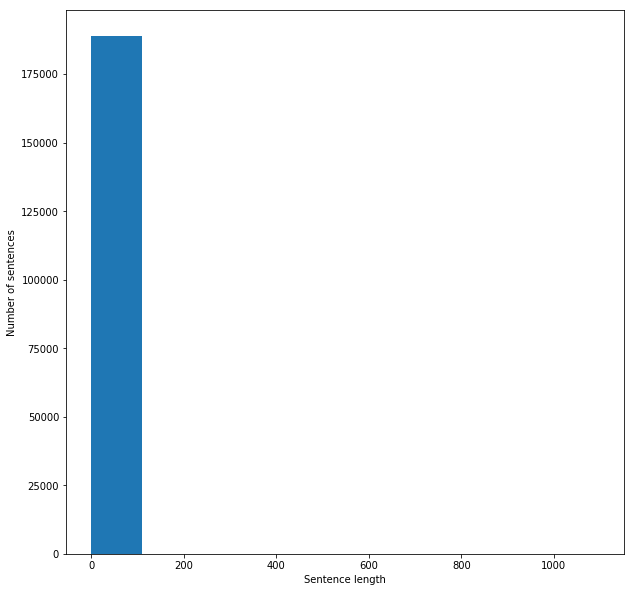

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

### On to the Machine Learning<br />
Now that our data is clean and prepared, let's dive in to the machine learning part.
<br /><br />
Enter embeddings
Machine Learning on images can use raw pixels as inputs. Fraud detection algorithms can use customer features. What can NLP use?
<br /><br />
A natural way to represent text for computers is to encode each character individually, this seems quite inadequate to represent and understand language. Our goal is to first create a useful embedding for each sentence (or tweet) in our dataset, and then use these embeddings to accurately predict the relevant category.
<br /><br />
The simplest approach we can start with is to use a bag of words model, and apply a logistic regression on top. A bag of words just associates an index to each word in our vocabulary, and embeds each sentence as a list of 0s, with a 1 at each index corresponding to a word present in the sentence.
<br /><br />
### Bag of Words Counts¶

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df_non_dup["sentence"].tolist()
list_labels = df_non_dup["region"].tolist()

counts, count_vectorizer = cv(list_corpus)

X_train_counts, X_test_counts, y_train_counts, y_test_counts = train_test_split(counts, list_labels, test_size=0.2, random_state=40)

In [66]:
df_non_dup.head()

,source,region,url,sentence,tokens
0,guardian,0,https://www.theguardian.com/football/2011/dec/...,"for real madrid, it started so very well and e...","[for, real, madrid, it, started, so, very, wel..."
1,guardian,0,https://www.theguardian.com/football/2011/dec/...,a goal after just 23 seconds gave them the le...,"[a, goal, after, just, 23, seconds, gave, them..."
2,guardian,0,https://www.theguardian.com/football/2011/dec/...,at 10,"[at, 10]"
3,guardian,0,https://www.theguardian.com/football/2011/dec/...,"01, madrid effectively had a six point lead at...","[01, madrid, effectively, had, a, six, point, ..."
4,guardian,0,https://www.theguardian.com/football/2011/dec/...,by the time the final whistle went just befor...,"[by, the, time, the, final, whistle, went, jus..."


In [67]:
set(list_labels)

{0, 1}

Visualize the embeddings

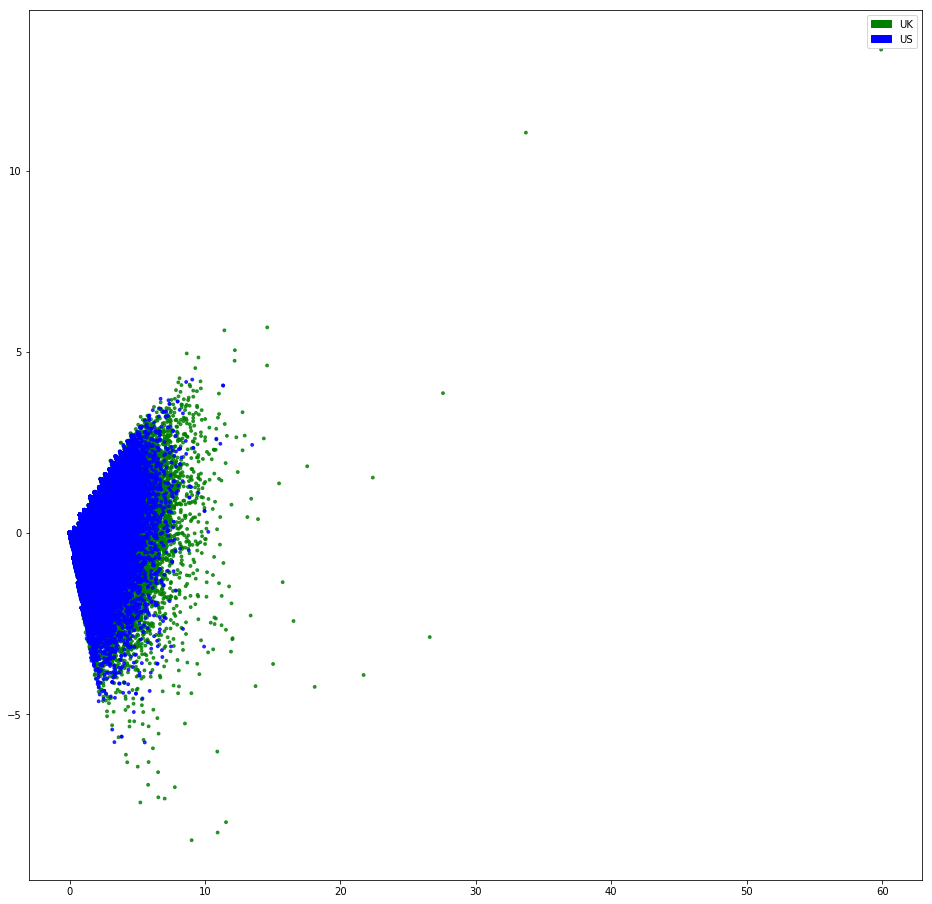

In [69]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['green','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, c=test_labels, alpha=.8, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='green', label='UK')
            blue_patch = mpatches.Patch(color='blue', label='US')
            plt.legend(handles=[red_patch, blue_patch])


fig = plt.figure(figsize=(16, 16))          
plot_LSA(counts, list_labels)
plt.show()

### Fitting a classifier<br /><br />
Starting with a logistic regression is a good idea. It is simple, often gets the job done, and is easy to interpret.

In [70]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train_counts)

y_predicted_counts = clf.predict(X_test_counts)

### Evaluation<br />
Let's start by looking at some metrics to see if our classifier performed well at all.

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test_counts, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.809, precision = 0.811, recall = 0.809, f1 = 0.809


### Inspection
A metric is one thing, but in order to make an actionnable decision, we need to actually inspect the kind of mistakes our classifier is making. Let's start by looking at the confusion matrix.

In [72]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return plt

Normalized confusion matrix


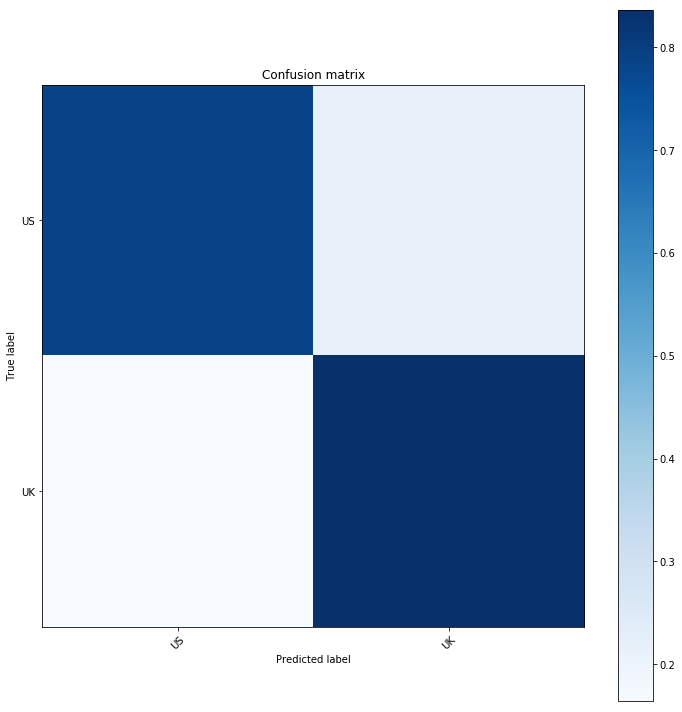

[[15353  4230]
 [ 2986 15216]]


In [73]:
cm = confusion_matrix(y_test_counts, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['US','UK'], normalize=True, title='Confusion matrix')
plt.show()
print(cm)

### Further inspection<br />
Let's look at the features our classifier is using to make decisions.

In [74]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

Plot important words

In [75]:
importance

{0: {'bottom': [(-9.5845850985896401, 'gleckman'),
   (-10.118450335378922, 'interferes'),
   (-10.256575639035892, '522'),
   (-10.361037482636014, 'theatres'),
   (-10.67623993671943, 'globalisation'),
   (-11.014510835366535, 'huffpo'),
   (-11.050139391626207, 'nbsp'),
   (-11.897673191898923, 'berlinger'),
   (-11.90905538581465, 'boehner'),
   (-12.012002044138775, 'walton')],
  'tops': [(9.5280187127933988, 'lind'),
   (9.5940111257756442, 'rosenqvist'),
   (9.6137248987398518, 'zaccarelli'),
   (9.8397075327077026, 'bolivar'),
   (10.057481691053757, 'pieminister'),
   (10.095113257548965, 'uneca'),
   (10.710227708248363, 'bitcoin'),
   (10.827740105342558, 'factum'),
   (10.878280523484868, 'brawley'),
   (10.972346236994197, 'smithsonian')]}}

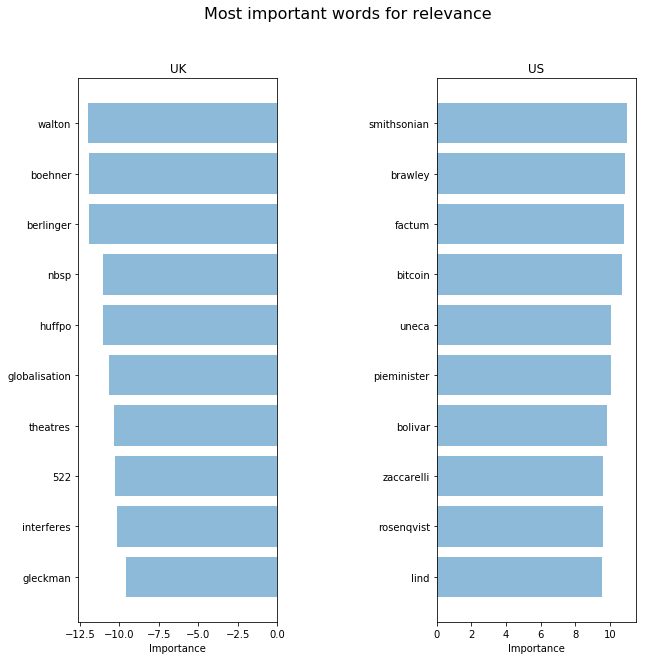

In [76]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))

    fig = plt.figure(figsize=(10, 10))          
    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('UK')
    plt.yticks(y_pos, bottom_words)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance')
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('US')
    plt.yticks(y_pos, top_words)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance')
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

### TFIDF Bag of Words<br />
Let's try a slightly more subtle approach. On top of our bag of words model, we use a TF-IDF (Term Frequency, Inverse Document Frequency) which means weighing words by how frequent they are in our dataset, discounting words that are too frequent, as they just add to the noise.

In [77]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

tfidfs, tfidf_vectorizer = tfidf(list_corpus)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidfs, list_labels, test_size=0.2, random_state=40)

In [78]:
importance

{0: {'bottom': [(-9.5845850985896401, 'gleckman'),
   (-10.118450335378922, 'interferes'),
   (-10.256575639035892, '522'),
   (-10.361037482636014, 'theatres'),
   (-10.67623993671943, 'globalisation'),
   (-11.014510835366535, 'huffpo'),
   (-11.050139391626207, 'nbsp'),
   (-11.897673191898923, 'berlinger'),
   (-11.90905538581465, 'boehner'),
   (-12.012002044138775, 'walton')],
  'tops': [(9.5280187127933988, 'lind'),
   (9.5940111257756442, 'rosenqvist'),
   (9.6137248987398518, 'zaccarelli'),
   (9.8397075327077026, 'bolivar'),
   (10.057481691053757, 'pieminister'),
   (10.095113257548965, 'uneca'),
   (10.710227708248363, 'bitcoin'),
   (10.827740105342558, 'factum'),
   (10.878280523484868, 'brawley'),
   (10.972346236994197, 'smithsonian')]}}

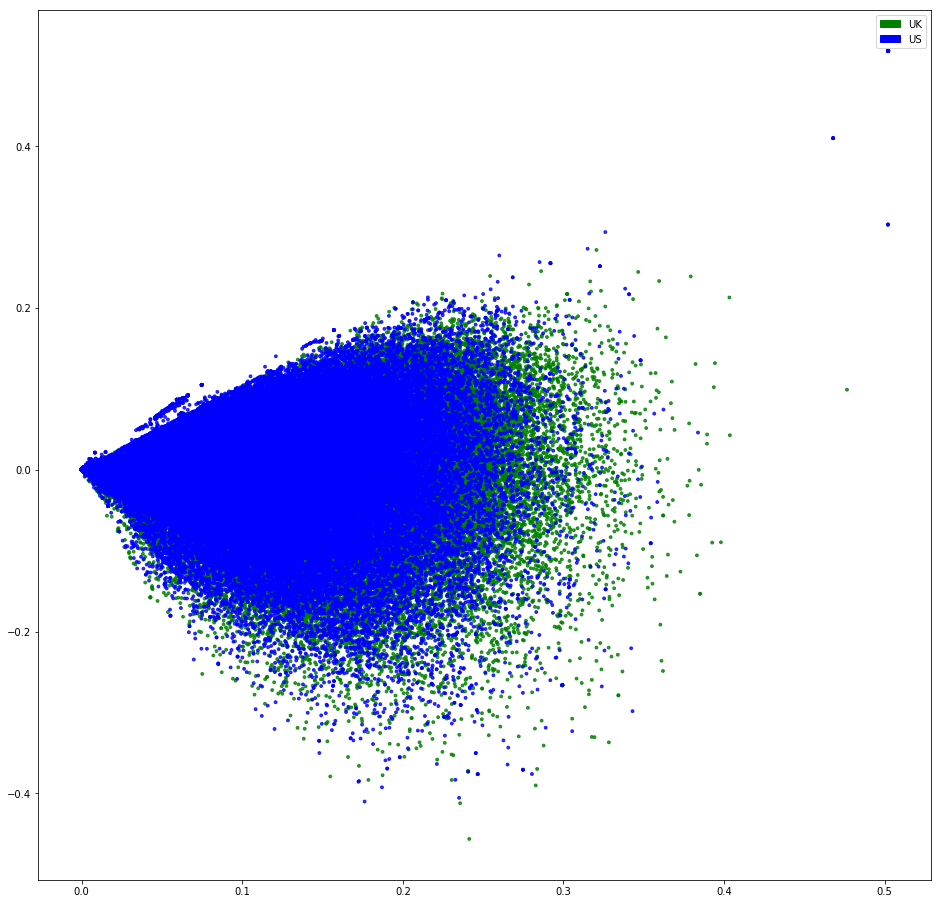

In [79]:
tfidfs.shape
fig = plt.figure(figsize=(16, 16))          
plot_LSA(tfidfs, list_labels)
plt.show()

## Use word2vec to do a translation between British and American English

In [80]:
import gensim
from gensim.models import translation_matrix

### Now lets create the word embeddings<br />
size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).<br />
window: (default 5) The maximum distance between a target word and words around the target word.<br />
min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.<br />
workers: (default 3) The number of threads to use while training.<br />
sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [101]:
british_vec = gensim.models.Word2Vec(df_non_dup.loc[df_non_dup['region'] == 0, 'tokens'], size=300)
american_vec = gensim.models.Word2Vec(df_non_dup.loc[df_non_dup['region'] == 1, 'tokens'], size=300)

In [102]:
british_vec.wv.save("british")
american_vec.wv.save("american")


In [145]:
#test_british_vec = gensim.models.KeyedVectors.load_word2vec_format('british', binary=True)
from gensim import models
test_british_vec = models.KeyedVectors.load('british')

In [103]:
british_vocab = british_vec[british_vec.wv.vocab]
american_vocab = american_vec[american_vec.wv.vocab]

/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/Users/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


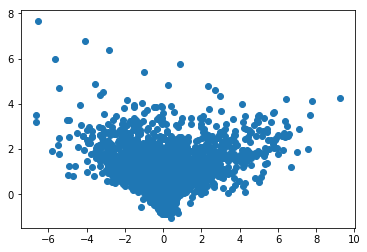

In [104]:
pca = PCA(n_components=2)
result = pca.fit_transform(american_vocab)
matplotlib.pyplot.scatter(result[:, 0], result[:, 1])
plt.show()

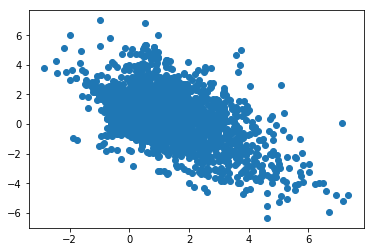

In [105]:
pca = PCA(n_components=2)
result = pca.fit_transform(british_vocab)
matplotlib.pyplot.scatter(result[:, 0], result[:, 1])
plt.show()

You can print the vocabulary here.

In [106]:
print(list(british_vec.wv.vocab))

['for', 'real', 'madrid', 'it', 'started', 'so', 'very', 'well', 'and', 'ended', 'badly', 'a', 'goal', 'after', 'just', '23', 'seconds', 'gave', 'them', 'the', 'lead', 'against', 'barcelona', 'seemed', 'to', 'open', 'way', 'shift', 'in', 'balance', 'of', 'power', 'at', '10', '01', 'effectively', 'had', 'six', 'point', 'top', 'la', 'liga', 'with', 'game', 'hand', 'most', 'considered', 'by', 'time', 'final', 'whistle', 'went', 'before', 'midnight', 'santiago', 'bernab', 'u', 'was', 'already', 'half', 'empty', 'long', 'been', 'control', 'they', 'were', 'back', 'on', 'too', 'everything', 'changes', 'stays', 'same', 'jos', 'mourinho', 'may', 'take', 'comfort', 'from', 'knowing', 'that', 'his', 'side', 'will', 'go', 'three', 'points', 'clear', 'if', 'win', 'next', 'weekend', 'while', 'are', 'club', 'world', 'cup', 'but', 'ultimately', 'all', 'recent', 'doubts', 'once', 'again', 'wonderful', 'improvements', 'not', 'good', 'enough', 'now', 'is', 'who', 'be', 's', 'won', '15', 'out', 'different

In [107]:
from gensim import utils

In [112]:
train_file = "training_words1000.txt" # from https://www.ef.edu/english-resources/english-vocabulary/top-1000-words/

with utils.smart_open(train_file, "r") as f:
    word_pair = [tuple(utils.any2unicode(line).strip().split()) for line in f]
#    word_pair = [tuple(line.encode("utf-8").decode("utf-8").split()) for line in f]
        
print (word_pair)


[('word', 'word'), ('the', 'the'), ('be', 'be'), ('to', 'to'), ('of', 'of'), ('and', 'and'), ('a', 'a'), ('in', 'in'), ('that', 'that'), ('have', 'have'), ('it', 'it'), ('for', 'for'), ('not', 'not'), ('on', 'on'), ('with', 'with'), ('he', 'he'), ('as', 'as'), ('you', 'you'), ('do', 'do'), ('at', 'at'), ('this', 'this'), ('but', 'but'), ('his', 'his'), ('by', 'by'), ('from', 'from'), ('they', 'they'), ('we', 'we'), ('say', 'say'), ('her', 'her'), ('she', 'she'), ('or', 'or'), ('an', 'an'), ('will', 'will'), ('my', 'my'), ('one', 'one'), ('all', 'all'), ('would', 'would'), ('there', 'there'), ('their', 'their'), ('what', 'what'), ('so', 'so'), ('up', 'up'), ('out', 'out'), ('if', 'if'), ('about', 'about'), ('who', 'who'), ('get', 'get'), ('which', 'which'), ('go', 'go'), ('me', 'me'), ('when', 'when'), ('make', 'make'), ('can', 'can'), ('like', 'like'), ('time', 'time'), ('no', 'no'), ('just', 'just'), ('him', 'him'), ('know', 'know'), ('take', 'take'), ('people', 'people'), ('into', 'i

In [113]:

transmat = translation_matrix.TranslationMatrix(american_vec.wv, british_vec.wv)
transmat.train(word_pair)
#print ("the shape of translation matrix is: ", transmat.translation_matrix.shape)

#transmat = translation_matrix.TranslationMatrix(american_vec, british_vec, word_pair)
#transmat.train(word_pair)
#translated_word = transmat.translate(words, topn=3)



In [147]:
value = transmat.translate(['the', 'car', 'is', 'full'], topn=3, source_lang_vec=american_vec.wv, target_lang_vec=british_vec.wv)


In [150]:
dir(value)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'move_to_end',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [148]:
# From here on out we will focus on the text portions of the dataset. Tokenizing the text of article using sci-kits Count Vectorizer(bag of words methodolgy):

# Articles from The Guardian
guardian_count_vect = CountVectorizer(stop_words="english")
guardian_matrix_CV = guardian_count_vect.fit_transform(df['bodytext'][df['source'].isin(['guardian'])])
guardian_features  = guardian_count_vect.get_feature_names()

# Articles NOT from The Guardian
not_guardian_count_vect = CountVectorizer(stop_words="english")
not_guardian_matrix_CV = not_guardian_count_vect.fit_transform(df['bodytext'][df['source'].isin(['fake_npr'])])
not_guardian_features  = not_guardian_count_vect.get_feature_names()


In [149]:
guardian_count_vect.vocabulary_.get(u'algorithm')
not_guardian_count_vect.vocabulary_.get(u'algorithm')

6621

<br /><br /><br /><br />
# WORD2VEC TESTING WITH PHRASES

In [229]:
from gensim.models.phrases import Phrases